## <u>ASSIGNMENT 04: COMP7116001 - COMPUTER VISION 2022</u>

<table>
    <tr>
        <th style="text-align:left;">Name</th>
        <td style="text-align:left;">Cindy Amanda Onggirawan</td>
        <th style="text-align:left;">Lecturer</th>
        <td style="text-align:left;">Dr. Ir. Diaz D. Santika, M.Sc.</td>
    </tr>
    <tr>
        <th style="text-align:left;">NIM</th>
        <td style="text-align:left;">2440055351</td>
        <th style="text-align:left;">Lecturer Code</th>
        <td style="text-align:left;">D1159</td>
    </tr>
    <tr>
        <th style="text-align:left;">Class</th>
        <td style="text-align:left;" colspan="3">LA01</td>
    </tr>
</table>

### Harris Corner Algorithm

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('./image.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

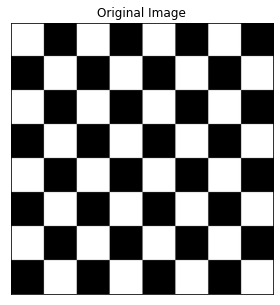

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
img_gaussian = cv2.GaussianBlur(gray, (3,3), 0)

In [5]:
height = img.shape[0]
width = img.shape[1]

In [6]:
matrix_R = np.zeros((height, width))

Hitung turunan x dan y. Untuk ini, kita dapat menggunakan fungsi Sobel() dari OpenCV.

### 1. Compute Gaussian derivatives at each pixel

In [7]:
# Hitung turunan pertama gambar x dan y (dx & dy)
dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)

Turunkan lagi nilai-nilai sebelumnya untuk mendapatkan turunan kedua.

In [8]:
# Hitung produk dan turunan kedua gambar (dx2, dy2 & dxy)
dx2 = np.square(dx)
dy2 = np.square(dy)
dxy = dx*dy

### 2. Compute second moment matrix M in a Gaussian window around each pixel <br> 3. Compute corner response function R

In [9]:
window_size = 5
offset = int(window_size/2)

Untuk setiap piksel, jumlahkan turunan kedua yang diperoleh. Di sini kita melakukan saringan 1 piksel dari jendela di atas gambar. Kemudian, kita menentukan matriks M. Lalu, kita menghitung respons detektor dalam matriks R.

In [10]:
# Hitung jumlah produk turunan untuk setiap piksel (Sx2, Sy2 & Sxy)
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
        Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])
        
        # Tentukan matriks M(x,y) = [[Sx2,Sxy], [Sxy,Sy2]]
        matrix_M = np.array([[Sx2,Sxy], [Sxy,Sy2]])
        
        # Hitung fungsi respon (R = det(matrix_M)-k(Trace(matrix_M))^2)
        k = 0.04
        det = np.linalg.det(matrix_M)
        tr = np.matrix.trace(matrix_M)
        R = det-k*(tr**2)
        matrix_R[y-offset, x-offset] = R

### 4. Threshold R <br> 5. Find local maxima of response function (non-maximum suppression

Akhirnya, kita menggunakan nilai threshold untuk mengecualikan beberapa deteksi. Pada langkah sebelumnya, hasil respon matriks R telah dinormalisasi dan hanya bervariasi antara 0 dan 1, sehingga nilai threshold juga harus berada diantara nilai 0 dan 1.

In [11]:
# Temukan semua titik diatas threshold (nonmax supression line)
cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        value = matrix_R[y, x]
        threshold = 0.3
        if value > threshold:
            cv2.circle(img, (x,y), 3, (0,0,255))

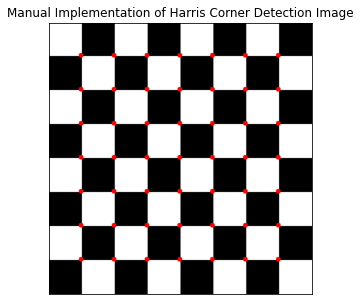

In [12]:
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Manual Implementation of Harris Corner Detection Image')
plt.xticks([]), plt.yticks([])
plt.show()

### Another Method: Directly use OpenCV built-in function

In [13]:
img2 = cv2.imread('./image.png')
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [14]:
# Terapkan metode cv2.cornerHarris untuk mendeteksi corners
harris = cv2.cornerHarris(gray, 8, 3, 0.04)

In [15]:
# Hasil ditandai melalui corners yang melebar
harris = cv2.dilate(harris, None)

In [16]:
# Mengembalikan kembali ke gambar asli dengan nilai threshold optimal
img2[harris > 0.3 * harris.max()] = [255,0,255]

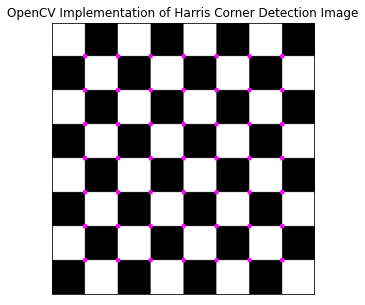

In [17]:
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('OpenCV Implementation of Harris Corner Detection Image')
plt.xticks([]), plt.yticks([])
plt.show()

Kita dapat melihat bahwa algoritma kita sudah benar dan menyerupai built-in function dari OpenCV.

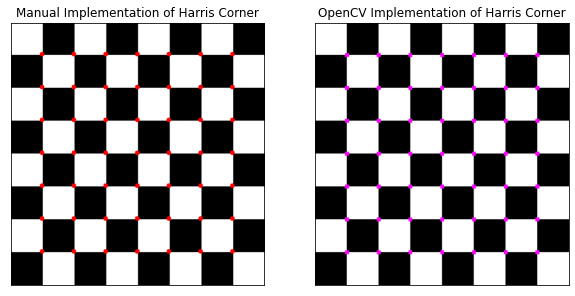

In [18]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Manual Implementation of Harris Corner')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('OpenCV Implementation of Harris Corner')
plt.xticks([]), plt.yticks([])

plt.show()

## THANK YOU